Generation:  0
chromosome	fitness
[4, 1, 10, 8, 5, 11, 7, 2, 3, 0, 9, 6] 	 -693.5065403739685
[4, 1, 10, 8, 5, 11, 7, 2, 3, 0, 9, 6] 	 -668.3053825595138
[4, 1, 10, 8, 5, 11, 7, 2, 3, 0, 9, 6] 	 -726.3098986866229
[4, 1, 10, 8, 5, 11, 7, 2, 3, 0, 9, 6] 	 -678.3794155403431
[4, 1, 10, 8, 5, 11, 7, 2, 3, 0, 9, 6] 	 -660.4261220419644
[4, 1, 10, 8, 5, 11, 7, 2, 3, 0, 9, 6] 	 -677.4390958645412
[4, 1, 10, 8, 5, 11, 7, 2, 3, 0, 9, 6] 	 -786.9791655665728
[4, 1, 10, 8, 5, 11, 7, 2, 3, 0, 9, 6] 	 -760.4714572321152
[4, 1, 10, 8, 5, 11, 7, 2, 3, 0, 9, 6] 	 -622.4948667739452
[4, 1, 10, 8, 5, 11, 7, 2, 3, 0, 9, 6] 	 -688.41810720755
[4, 1, 10, 8, 5, 11, 7, 2, 3, 0, 9, 6] 	 -616.0464747700678
[4, 1, 10, 8, 5, 11, 7, 2, 3, 0, 9, 6] 	 -708.7346181119556
[4, 1, 10, 8, 5, 11, 7, 2, 3, 0, 9, 6] 	 -657.7396450341282
[4, 1, 10, 8, 5, 11, 7, 2, 3, 0, 9, 6] 	 -563.3706346899655
[4, 1, 10, 8, 5, 11, 7, 2, 3, 0, 9, 6] 	 -706.7226081055792
[4, 1, 10, 8, 5, 11, 7, 2, 3, 0, 9, 6] 	 -732.8248850363407
[4, 1, 1

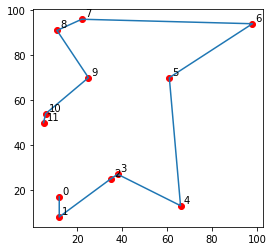

In [9]:
# -*- coding: utf-8 -*-
"""
Created on Feb 21 2022
Last edit on April 02 2022

@author: agademer & tdrumond & ndenier & hgu
"""

import random
import cities_module as cm

# List of cities (genes)
cities = cm.loadCities('cities.txt')
possible_cities = cm.defaultRoad(cities)


## CLASSES ##

class Individual:
    """Represents an Individual for a genetic algorithm"""

    def __init__(self, chromosome: list, fitness: float):
        """Initializes an Individual for a genetic algorithm 

        Args:
            chromosome (list[]): a list representing the individual's chromosome
            fitness (float): the individual's fitness (the higher, the better the fitness)
        """
        self.chromosome = chromosome
        self.fitness = fitness

    def __lt__(self, other):
        """Implementation of the less_than comparator operator"""
        return self.fitness < other.fitness

    def __repr__(self):
        """Representation of the object for print calls"""
        return f'Indiv({self.fitness:.1f},{self.chromosome})'


class GASolver:
    def __init__(self, selection_rate=0.5, mutation_rate=0.1):
        """Initializes an instance of a GASolver for a given GAProblem

        Args:
            selection_rate (float, optional): Selection rate between 0 and 1.0. Defaults to 0.5.
            mutation_rate (float, optional): Mutation rate between 0 and 1.0. Defaults to 0.1.
        """
        self._selection_rate = selection_rate
        self._mutation_rate = mutation_rate
        self._population = []
        self.generation = 0

    def resetPopulation(self, pop_size=50):
        """ Initialize the population with pop_size random Individuals 

        Args:
            pop_size (int, optional): size of the population (positive, minimum related to the selection_rate). Default to 50.
        """        
        self._population = [] # Empty the population

        # Generate pop_size random chromosomes
        for i in range(pop_size):
            chromosome = possible_cities
            random.shuffle(chromosome)
            
            fitness= -cm.roadLength(cities, chromosome) # Compute the fitness of the chromosome

            new_individual = Individual(chromosome=chromosome, fitness=fitness) # Create new individual
            self._population.append(new_individual) # Add it to the population


    def evolveForOneGeneration(self):
        """ Apply the process for one generation : 
            -	Sort the population (Descending order)
            -	Remove _selection_rate of population (less adapted)
            -   Recreate the same quantity by crossing the surviving ones 
            -	For each new Individual, mutate with probability mutation_rate 
                i.e., mutate it if a random value is below mutation_rate
        """
        
        # Sort the population (descending order)
        self._population.sort(reverse=True)

        # Remove _selection_rate of the population
        number_individuals = len(self._population)
        number_kept = round(self._selection_rate*number_individuals)
        self._population = self._population[:number_kept]
        
        # Crossing the survivors to recreate the same quantity of individuals as originally
        for n in range(number_individuals-number_kept):
            # Select parent 1 randomly
            parent1 = self._population[0] # Default value in case no parent is selected
            for i in self._population:
                number = random.random()
                if (number < self._selection_rate):
                    parent1 = i.chromosome
                    parent1_index = self._population.index(i)
                    break
            # Select parent 2 randomly andd different from parent 1
            parent2 = self._population[1] # Default value in case no parent is selected
            for i in self._population:
                number = random.random()
                if (number < self._selection_rate and self._population.index(i) != parent1_index):
                    parent2 = i.chromosome
                    break
        
            # Create new individual from 2 parents
            nbCities = cm.countCities("cities.txt")
            cut = round(nbCities/2)
            new_chromosome = parent1[:cut]
            for c in parent2[cut:]:
                if c not in new_chromosome:
                    new_chromosome.append(c)
            for c in possible_cities:
                if c not in new_chromosome:
                    new_chromosome.append(c)

            new_individual = Individual(chromosome=new_chromosome, fitness=-cm.roadLength(cities, new_chromosome))
            self._population.append(new_individual)

        # Mutation for _mutation_rate of the population
        for i in self._population:
            number = random.random()
            if (number < self._mutation_rate):
                # A random value is assigned to a random gene of the chromosome
                city1 = random.randint(0,nbCities-1)
                city2 = random.randint(0,nbCities-1)
                while (city1 == city2):
                    city2 = random.randint(0,nbCities-1)
                # swap two cities
                i.chromosome[city1], i.chromosome[city2] = i.chromosome[city2], i.chromosome[city1]
                i.fitness = -cm.roadLength(cities, i.chromosome) # The fitness is recomputed for the mutated chromosome

        # Increment the generation count
        self.generation+=1 
        

    def showGenerationSummary(self):
        """ Print some debug information on the current state of the population """
        print('Generation: ',self.generation)
        print('chromosome\tfitness')
        for i in self._population:
            print(i.chromosome,'\t',i.fitness)
            
    def getBestIndividual(self):
        """ Return the best Individual of the population """
        # Sort the population according to the fitness value (the higher the better)
        self._population.sort(reverse=True)
        # Get the first element of the population, which is the best individual
        best=self._population[0]
        return best

    def evolveUntil(self, max_nb_of_generations=500, threshold_fitness=-350):
        """ Launch the evolveForOneGenerfitnessation function until one of the two condition is achieved : 
            - Max nb of generation is achieved
            - The fitness of the best Individual is greater than or equal to
              threshold_fitness
        """
        fitness_max = self.getBestIndividual().fitness
        while (self.generation < max_nb_of_generations and fitness_max < threshold_fitness):
            fitness_max = self.getBestIndividual().fitness
            self.evolveForOneGeneration()


## MAIN PROGRAM ##

solver = GASolver(selection_rate=0.5, mutation_rate=0.2)
solver.resetPopulation()
solver.showGenerationSummary()
print()
solver.evolveUntil()
solver.showGenerationSummary()
        
print()
best = solver.getBestIndividual()
print(best.chromosome, best.fitness)
cm.drawCities(cities,best.chromosome)

# The best path can vary because the starting point can be different for each population
